### **BANA 277 Custumer & Social Analysis Final Project**

**Team 10B**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
from scipy.stats import norm, skew
import scipy.stats as stats
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import scipy
from scipy.stats import zscore
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
!pip install -U kaleido
import os
import plotly.graph_objs as go
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.io as pio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

**Data Preparation**

In [ ]:
df = pd.read_csv('/content/sample_data/HR-Employee-Attrition.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Exploratory Data Analysis (EDA)

In [ ]:
# head
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber", "MonthlyRate", "DailyRate", "HourlyRate"], axis="columns", inplace = True)

In [ ]:
df.shape

(1470, 28)

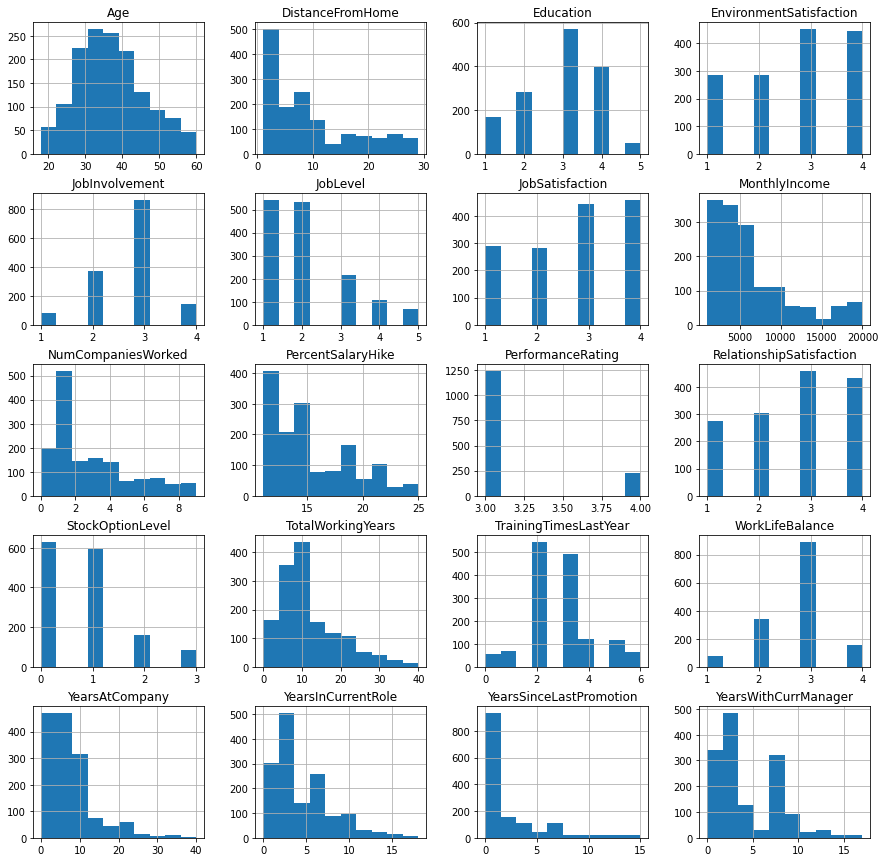

In [ ]:
df.hist(figsize=(15,15))
plt.show()

In [ ]:
def barplot(var_select, x_no_numeric) :
    tmp1 = df[(df['Attrition'] != 0)]
    tmp2 = df[(df['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(df[var_select],df['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['green','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='green',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.7
        )))

    layout = dict(title =  str(var_select),title_x=0.5,
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)


In [ ]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = df['Attrition'].corr(df[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors=['green','gold' ]

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select,title_x=0.5)

    py.iplot(fig, filename = 'Density plot')

In [ ]:
def plot_pie(var_select) :
    
    colors = ['gold', 'green', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employes attrition ",title_x=0.5,
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [ ]:
def assign_label(x):
    if x == 'No':
      return 0
    elif x == 'Yes':
      return 1

In [ ]:
df['Attrition'] = df['Attrition'].apply(assign_label)

In [ ]:
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]

In [ ]:
#Target
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['Attrition'].value_counts(), 
               textfont=dict(size=20), opacity = 0.8,
               marker=dict(colors=['green','gold'], 
                           line=dict(color='#000000', width=1.0)))


layout = dict(title =  'Distribution of attrition variable',title_x=0.5)
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

# Personal

#### Demographic

In [ ]:
barplot('Age', False)

In [ ]:
barplot('Gender', False)

In [ ]:
barplot('MaritalStatus', False)

#### Environment

In [ ]:
barplot('NumCompaniesWorked', False)

In [ ]:
barplot('DistanceFromHome', False)

#### Finance

In [ ]:
plot_distribution('MonthlyIncome', 100)

In [ ]:
barplot('PercentSalaryHike', False)

In [ ]:
barplot('StockOptionLevel', False)

#### Professional

In [ ]:
barplot('JobRole',True)

In [ ]:
barplot('Education', False)

In [ ]:
barplot('EducationField',True)

## Job Related

#### Generalist / Specialist

In [ ]:
barplot('Department',True)

In [ ]:
barplot('JobInvolvement',False)

In [ ]:
barplot('JobLevel',False)

In [ ]:
barplot('YearsWithCurrManager',False)

#### Years

In [ ]:
barplot('TotalWorkingYears',False)

In [ ]:
barplot('YearsAtCompany',False)

In [ ]:
barplot('YearsInCurrentRole',False)

In [ ]:
barplot('YearsSinceLastPromotion',False)

#### Job Satisfaction

In [ ]:
barplot('JobSatisfaction',False)

In [ ]:
barplot('RelationshipSatisfaction',False)

In [ ]:
barplot('EnvironmentSatisfaction',False)

In [ ]:
barplot('WorkLifeBalance',False)

In [ ]:
barplot('BusinessTravel',False)

In [ ]:
plot_pie('PerformanceRating')

In [ ]:
barplot('PerformanceRating',False)

In [ ]:
barplot('OverTime',False)

In [ ]:
plot_pie('OverTime')

#Modeling

### data processing & train-test split

In [ ]:
len(df.columns)

28

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(["Attrition"]).tolist()
print(numeric_cols)

['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


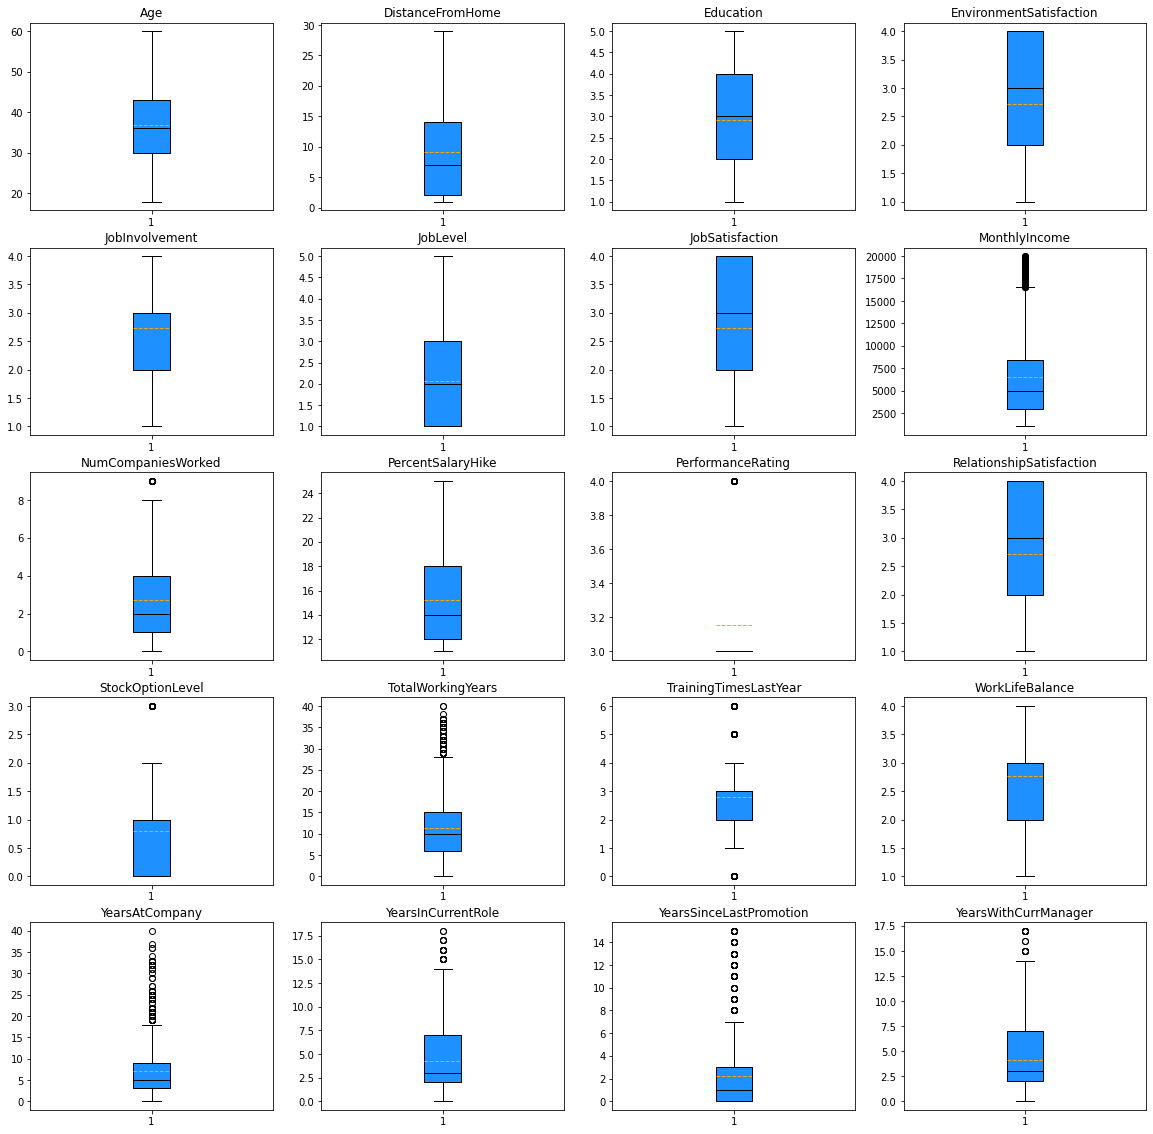

In [ ]:
numeric_cols = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# define box and mean colors
box_color = 'DodgerBlue'
mean_color = 'orange'

# create a box plot for each numeric column
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
for i, col in enumerate(numeric_cols):
    bp = ax[i//4, i%4].boxplot(df[col], showmeans=True, meanline=True, patch_artist=True, boxprops=dict(facecolor=box_color),
               meanprops=dict(color=mean_color), medianprops=dict(color='black'))
    ax[i//4, i%4].set_title(col)

plt.show()

In [ ]:
# input only the non categorical colmns

In [ ]:
#Use IQR formular to range the outliers
def qr_outliers(col):
    outliers = []
    
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    inter_qr = q3 - q1
    lower_limit = q1 - 1.5 * inter_qr
    upper_limit = q3 + 1.5 * inter_qr
    for val in col:
        if val > upper_limit or val < lower_limit:
            outliers.append(val)
    return outliers

In [ ]:
col_outliers = []
for col in df.columns:
    if df[col].dtype == 'O'or col == 'Attrition' : 
        continue
   
    else : 
        outliers = qr_outliers(df[col])
        if outliers != []:
            col_outliers.append(col)
            print(col,':' ,outliers)

MonthlyIncome : [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
NumCompaniesWorked : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Perform

In [ ]:
print('NumCompaniesWorked:', df.NumCompaniesWorked.unique())
print('PerformanceRating:', df.PerformanceRating.unique())
print('StockOptionLevel:', df.StockOptionLevel.unique())

NumCompaniesWorked: [8 1 6 9 0 4 5 2 7 3]
PerformanceRating: [3 4]
StockOptionLevel: [0 1 3 2]


In [ ]:
constant_cols = col_outliers[1:4]
col_outliers[1:4] = []
col_outliers

['MonthlyIncome',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
def box_plot_outliers(cols, df):
    fig, ax = plt.subplots(7,2, figsize = (8, 15))
    
    i = 0
    j = 0
    for col in cols:
        #print(col)
        sns.boxplot(df[col], ax = ax[i, j])

        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel(col)
        j += 1

        df.loc[df[col] > 0, col], fitted_lambda = stats.boxcox(df[df[col] > 0][col], lmbda = None)
        sns.boxplot(df[col], ax = ax[i, j], color = '#FEE23E')
        ax[i, j].tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax[i, j].set_xlabel('')
        i += 1
        j -= 1
        
    fig.suptitle('Before [left] and After [Right] BoxCox Transformation for Removing Outliers ', fontsize = 12)
    fig.subplots_adjust(top = 0.98)
    fig.tight_layout()
    
    plt.show()

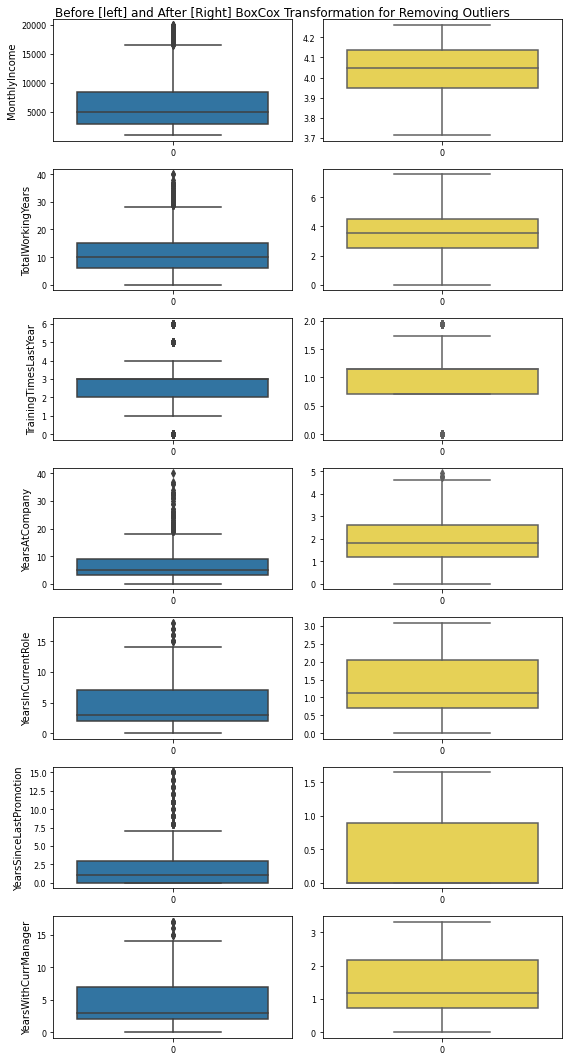

In [ ]:
box_plot_outliers(col_outliers, df)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: >

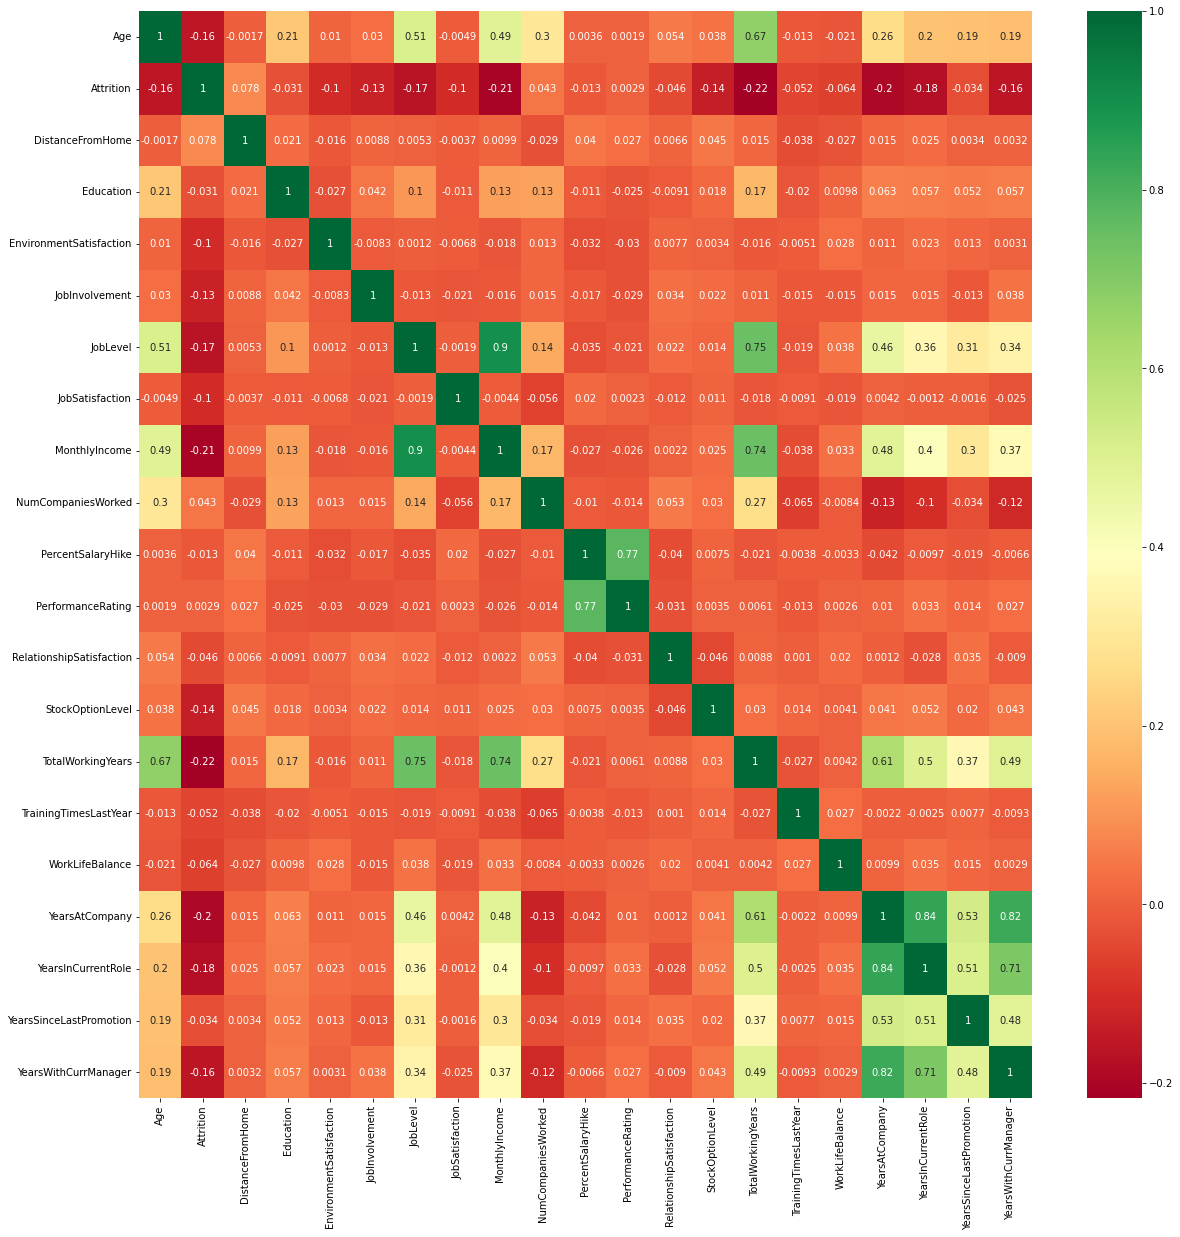

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

<Axes: >

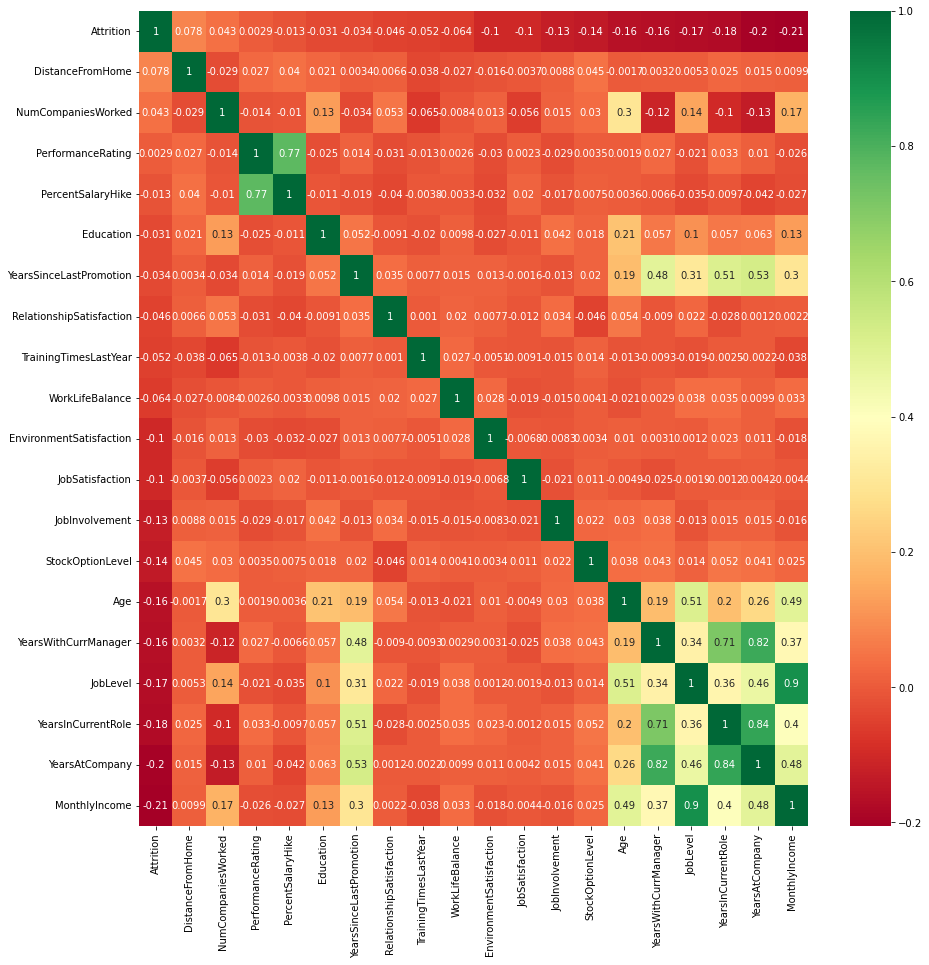

In [ ]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an object scaler
MMS = MinMaxScaler()
# get dummies 
dummies = pd.get_dummies(df[df.columns.difference(["Attrition"])])
# scaling the data and define features
X = MMS.fit_transform(dummies)
# Define target variable
y = df[["Attrition"]].values.ravel()


<Axes: >

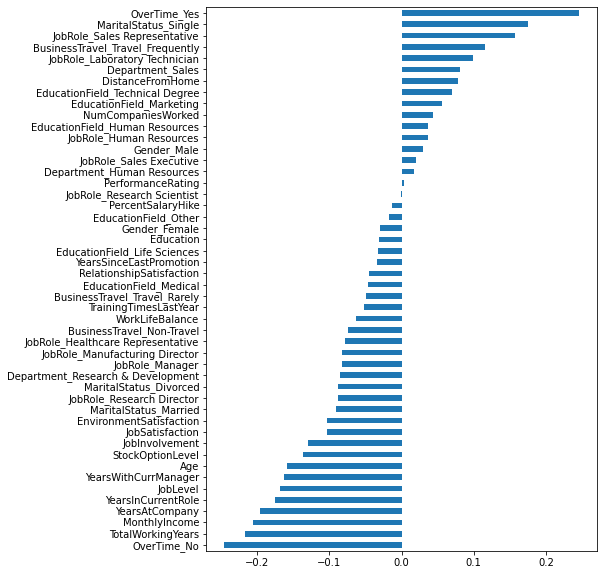

In [ ]:
dummies.corrwith(df.Attrition).sort_values().plot(kind='barh', figsize=(7, 10))

In [ ]:
dummies.shape

(1470, 48)

In [ ]:
dummies.shape

(1470, 48)

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, shuffle = True)

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 923, 1: 179})

In [ ]:
log_reg_model = LogisticRegression(max_iter=1000, solver = "newton-cg")
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [ ]:
y_pred = log_reg_model.predict(X_test)
print("Model accruracy score: {}".format(accuracy_score(y_test, y_pred)))

Model accruracy score: 0.8967391304347826


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.81      0.45      0.58        58

    accuracy                           0.90       368
   macro avg       0.86      0.71      0.76       368
weighted avg       0.89      0.90      0.88       368



In [ ]:
from sklearn.tree import DecisionTreeClassifier
best_params = {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'random'}
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=19,
                       splitter='random')

In [ ]:
y_pred = tree_clf.predict(X_test)
print("Model accruracy score: {}".format(accuracy_score(y_test, y_pred)))

Model accruracy score: 0.8505434782608695


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       310
           1       0.54      0.38      0.44        58

    accuracy                           0.85       368
   macro avg       0.71      0.66      0.68       368
weighted avg       0.83      0.85      0.84       368



In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(dummies.columns)

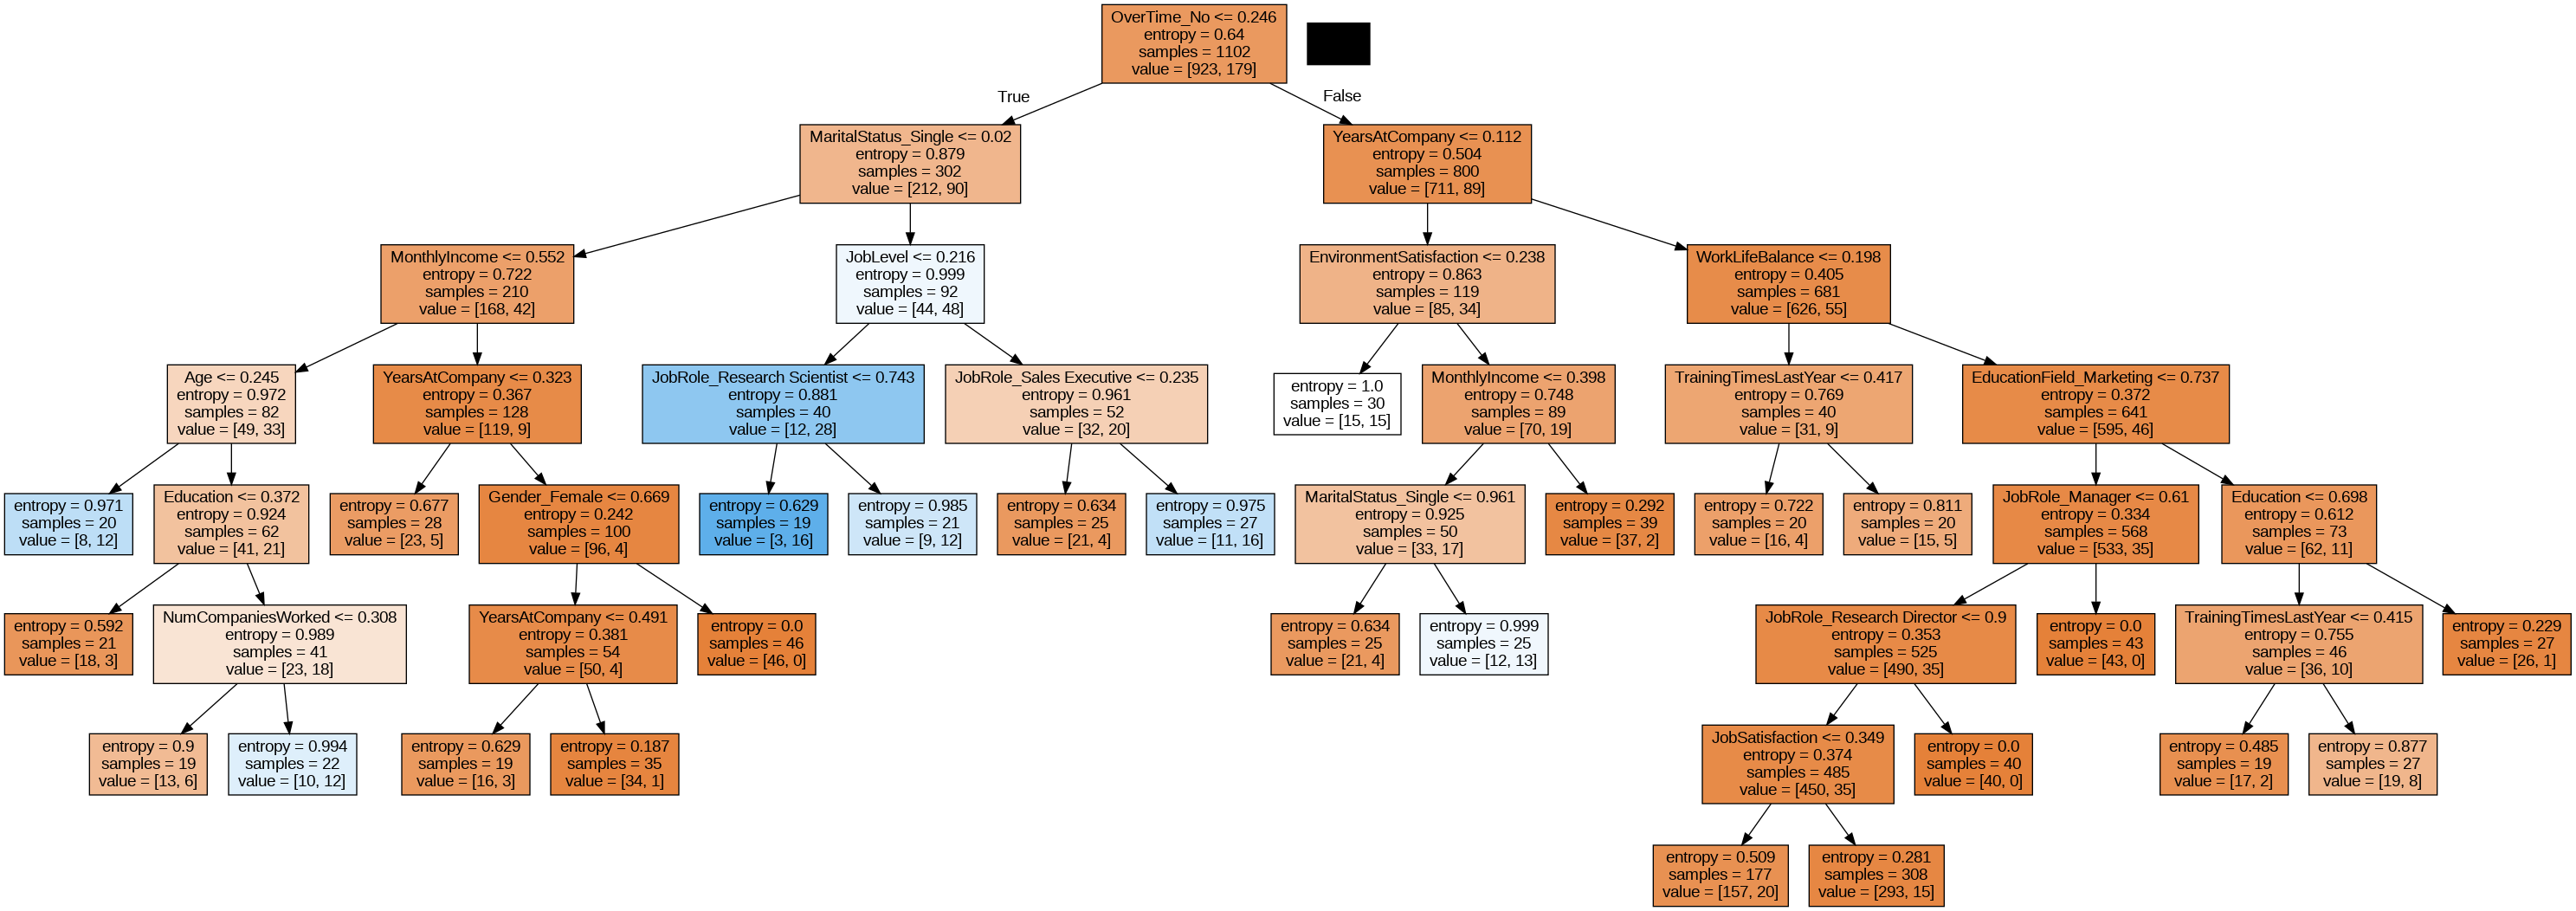

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE(random_state=0, sampling_strategy = 0.4)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_SMOTE) #new shape of the target

Counter({0: 923, 1: 369})

In [ ]:
log_reg_model = LogisticRegression(max_iter=1000, solver = "newton-cg")
log_reg_model.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [ ]:
y_pred = log_reg_model.predict(X_test)
print("Model accruracy score: {}".format(accuracy_score(y_test, y_pred)))

Model accruracy score: 0.8804347826086957


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       310
           1       0.63      0.59      0.61        58

    accuracy                           0.88       368
   macro avg       0.78      0.76      0.77       368
weighted avg       0.88      0.88      0.88       368



In [ ]:
#{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'random'})
tree_clf_smote = DecisionTreeClassifier(**best_params)
tree_clf_smote.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=19,
                       splitter='random')

In [ ]:
y_pred = tree_clf_smote.predict(X_test)
print("Model accruracy score: {}".format(accuracy_score(y_test, y_pred)))

Model accruracy score: 0.8152173913043478


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       310
           1       0.42      0.48      0.45        58

    accuracy                           0.82       368
   macro avg       0.66      0.68      0.67       368
weighted avg       0.83      0.82      0.82       368

